<center><u><H1>Linear Regression with Gradient Descent</H1></u></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Generating data:

In [2]:
N=100
w = 5
b = 2
noise_scale = .1
x = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N, 1))
y = np.reshape(w*x + b + noise, -1)

In [3]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


## Least Squares Model:

In [4]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
coef = lr.coef_
coef

array([4.94538246])

In [6]:
intercept = lr.intercept_
intercept

2.025578825076903

## Defining parameters for Gradient Descent:

In [7]:
learning_rate = 0.5
initial_b = 0 
initial_w = 0 
num_iterations = 100
loss = []

## Creating Functions to implement Gradient Descent:

In [8]:
def compute_error(b, w, x, y):
    totalError = 0
    for i in range(len(x)):
        totalError += (y[i] - (w * x[i] + b)) ** 2
    return totalError / float(len(x))

In [9]:
compute_error(2, 5, x, y)

array([0.00965151])

In [10]:
def gradient(b_current, w_current, x, y, learning_rate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(x))
    for i in range(0, len(x)):
        b_gradient += -(2/N) * (y[i] - ((w_current * x[i]) + b_current))
        w_gradient += -(2/N) * x[i] * (y[i] - ((w_current * x[i]) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_w = w_current - (learning_rate * w_gradient)
    return [new_b, new_w]

In [11]:
def plot_gradient_descent(x, y, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    plt.figure(figsize=(8,8))
    plt.scatter(x, y, s=80, color='blue', marker='o', edgecolor='white')
    
    for i in range(num_iterations):
        b, w = gradient(b, w, x, y, learning_rate)
        y_pred = x*w + b
        plt.plot(x, y_pred, color='red', lw=1, linestyle=':', alpha= 0.3)       
    
        error = compute_error(b, w, x, y)
        loss.append(error)
    
    plt.plot(x, y_pred,color='black', lw=3, linestyle='--' )
    return [b, w]

[array([2.02880557]), array([4.93938382])]

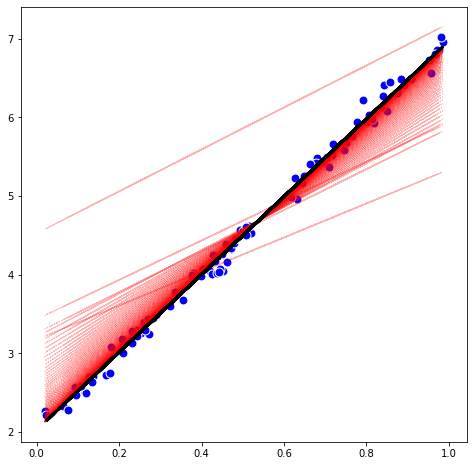

In [12]:
plot_gradient_descent(x, y, initial_b, initial_w, learning_rate, num_iterations)

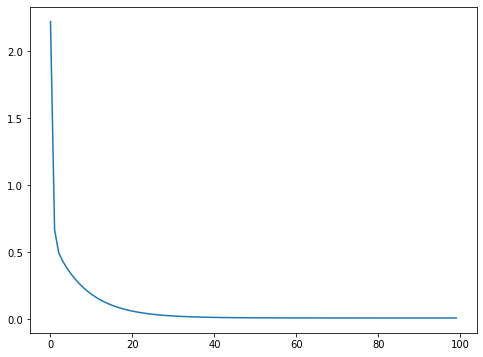

In [16]:
plt.figure(figsize=(8,6))
plt.plot(loss)